In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv('csv/processed_tickets_en.csv')
df.sample(3)

,processed_text,type,queue,priority,urgency
268,urgent google workspace service dear customer ...,Incident,Service Outages and Maintenance,high,urgent
91,assistance need reset password office 365 dear...,Problem,Technical Support,medium,not_urgent
80,urgent service outage schedule maintenance dea...,Incident,Service Outages and Maintenance,high,urgent


In [9]:
df.shape

(338, 5)

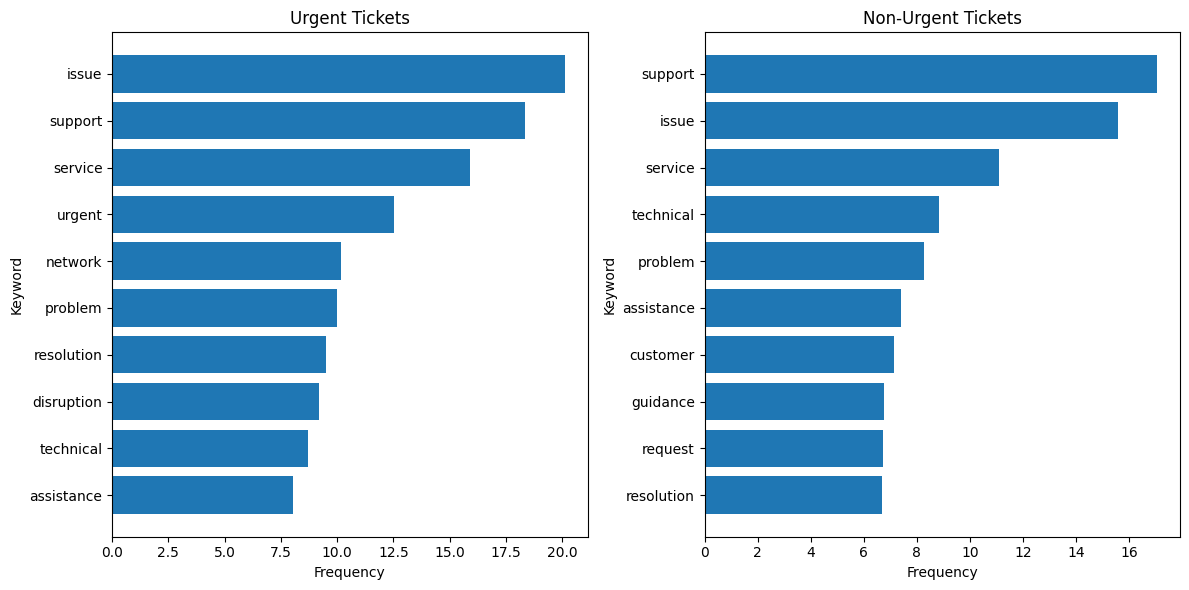

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

urgent_tickets = df[df['urgency'] == 'urgent']
non_urgent_tickets = df[df['urgency'] != 'urgent']

def create_charts(ax, df, title): 
    tdidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
    tdidf_matrix = tdidf_vectorizer.fit_transform(df['processed_text'])
    
    
    feature_names = tdidf_vectorizer.get_feature_names_out()
    word_scores = zip(feature_names, tdidf_matrix.sum(axis=0).tolist()[0])

    top_words = sorted(word_scores, key=lambda x: x[1], reverse=True)[:10]
    
    keywords, frequencies = zip(*top_words)
    
    ax.barh(keywords, frequencies)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Keyword')
    ax.invert_yaxis()
    
# two on one row
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
create_charts(axs[0], urgent_tickets, 'Urgent Tickets')
create_charts(axs[1], non_urgent_tickets, 'Non-Urgent Tickets')
plt.tight_layout()


In [13]:
from sklearn.model_selection import train_test_split

X = df[['processed_text']]
y = df['urgency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
text_transformer = Pipeline([
    ('tfidf', TfidfVectorizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', text_transformer, 'processed_text')
    ],
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  not_urgent       0.60      0.75      0.67        28
      urgent       0.79      0.65      0.71        40

    accuracy                           0.69        68
   macro avg       0.69      0.70      0.69        68
weighted avg       0.71      0.69      0.69        68



In [20]:
# Example prediction
example = pd.DataFrame({
    'processed_text': ['I need urgent help with my computer. It is not working. I need help as soon as possible.']
})

urgency = pipeline.predict(example)
print(f'Predicted urgency: {urgency[0]}')


Predicted urgency: not_urgent
